<a href="https://colab.research.google.com/github/jay900411/DataAnalysis/blob/main/%E5%8C%96%E5%B7%A5%E5%BB%A0%E5%8F%8D%E6%87%89%E5%99%A8%E6%BA%AB%E5%BA%A6%E7%9C%9F%E5%AF%A6%E5%95%8F%E9%A1%8C%E5%AF%A6%E4%BD%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.疫情嚴重時,該化工廠產量增加,化學反應爐的生產運
作時間為 18 個小時;經理為了產線的生產效益提高,告
訴資料科學家,反應器溫度是很重要的關鍵,因此經理
希望你能跟公司的資訊管理人員合作,看看能不能從中
央的控制軟體的紀錄檔,找出影響溫度的關鍵因子。
2.找出關鍵因子後,經理希望該名資料科學家可不可以再
幫忙利用人工智慧的技術幫忙提高產量?

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive') # 此處需要登入google帳號
# 獲取授權碼之後輸入即可連動雲端硬碟
data = pd.read_csv("/content/gdrive/My Drive/20211006.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data.head()

,0,Time,MFG,RB.01.Reactor_Temperature.PV,RB.01a.Reactor_Temperature.PV.HH,RB.01b.Reactor_Temperature.PV.PH,RB.01c.Reactor_Temperature.PV.PL,RB.01d.Reactor_Temperature.PV.LL,RB.02.Reactor_Temperature.SV,RB.03.Reactor_Pressure.PV,...,RB.13.Rareactor_Jacket_Flow_Rate.PV,RB.14.Jacket_Outlet_Temperature.PV,RB.15.Tank_Level.PV,RB.16.Rareactor_Jacket_Steam_Flow_Rate.PV,RB.17.Reactor_Process_start_flag.PV,RB.18.Reaction_Process_Pure_Water_Pour_Down_flag.PV,RB.19.Reaction_Process_Pure_Water_Pour_Down_Set_Value.BSET,RB.20.Reaction_Process_Pure_Water_Pour_Down_Measured_Value.SUM,RB.21.Reaction_Process_Pure_Water_Pour_Down_Operator_Numbering.DT,RB.22.Reaction_Process_Conversion_Rate.PV
0,1,2.021100e+13,SM,31.36,40,38,20,18,32.5,2.66,...,54.93,10.90,243.81,748.32,2,NaN,200,220.61,202101264,31.09
1,2,2.021100e+13,SM,31.36,40,38,20,18,32.5,2.66,...,54.89,11.00,243.82,741.71,2,NaN,200,220.61,202101264,31.09
2,3,2.021100e+13,SM,31.36,40,38,20,18,32.5,2.66,...,54.84,11.06,243.80,766.37,2,NaN,200,220.61,202101264,31.09
3,4,2.021100e+13,SM,31.36,40,38,20,18,32.5,2.66,...,54.85,11.16,243.81,820.76,2,NaN,200,220.61,202101264,31.09
4,5,2.021100e+13,SM,31.36,40,38,20,18,32.5,2.66,...,54.67,11.21,243.81,836.21,2,NaN,200,220.61,202101264,31.09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10596 entries, 0 to 10595
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   0                                                                  10596 non-null  int64  
 1   Time                                                               10596 non-null  float64
 2   MFG                                                                10596 non-null  object 
 3   RB.01.Reactor_Temperature.PV                                       10596 non-null  float64
 4   RB.01a.Reactor_Temperature.PV.HH                                   10596 non-null  int64  
 5   RB.01b.Reactor_Temperature.PV.PH                                   10596 non-null  int64  
 6   RB.01c.Reactor_Temperature.PV.PL                                   10596 non-null  int64  
 7   RB.01d.Reactor_Tempera

In [ ]:
df = data.drop(['0'], axis = 1)
df = df.drop(['MFG'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10596 entries, 0 to 10595
Data columns (total 31 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Time                                                               10596 non-null  float64
 1   RB.01.Reactor_Temperature.PV                                       10596 non-null  float64
 2   RB.01a.Reactor_Temperature.PV.HH                                   10596 non-null  int64  
 3   RB.01b.Reactor_Temperature.PV.PH                                   10596 non-null  int64  
 4   RB.01c.Reactor_Temperature.PV.PL                                   10596 non-null  int64  
 5   RB.01d.Reactor_Temperature.PV.LL                                   10596 non-null  int64  
 6   RB.02.Reactor_Temperature.SV                                       10596 non-null  float64
 7   RB.03.Reactor_Pressure

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Train Features


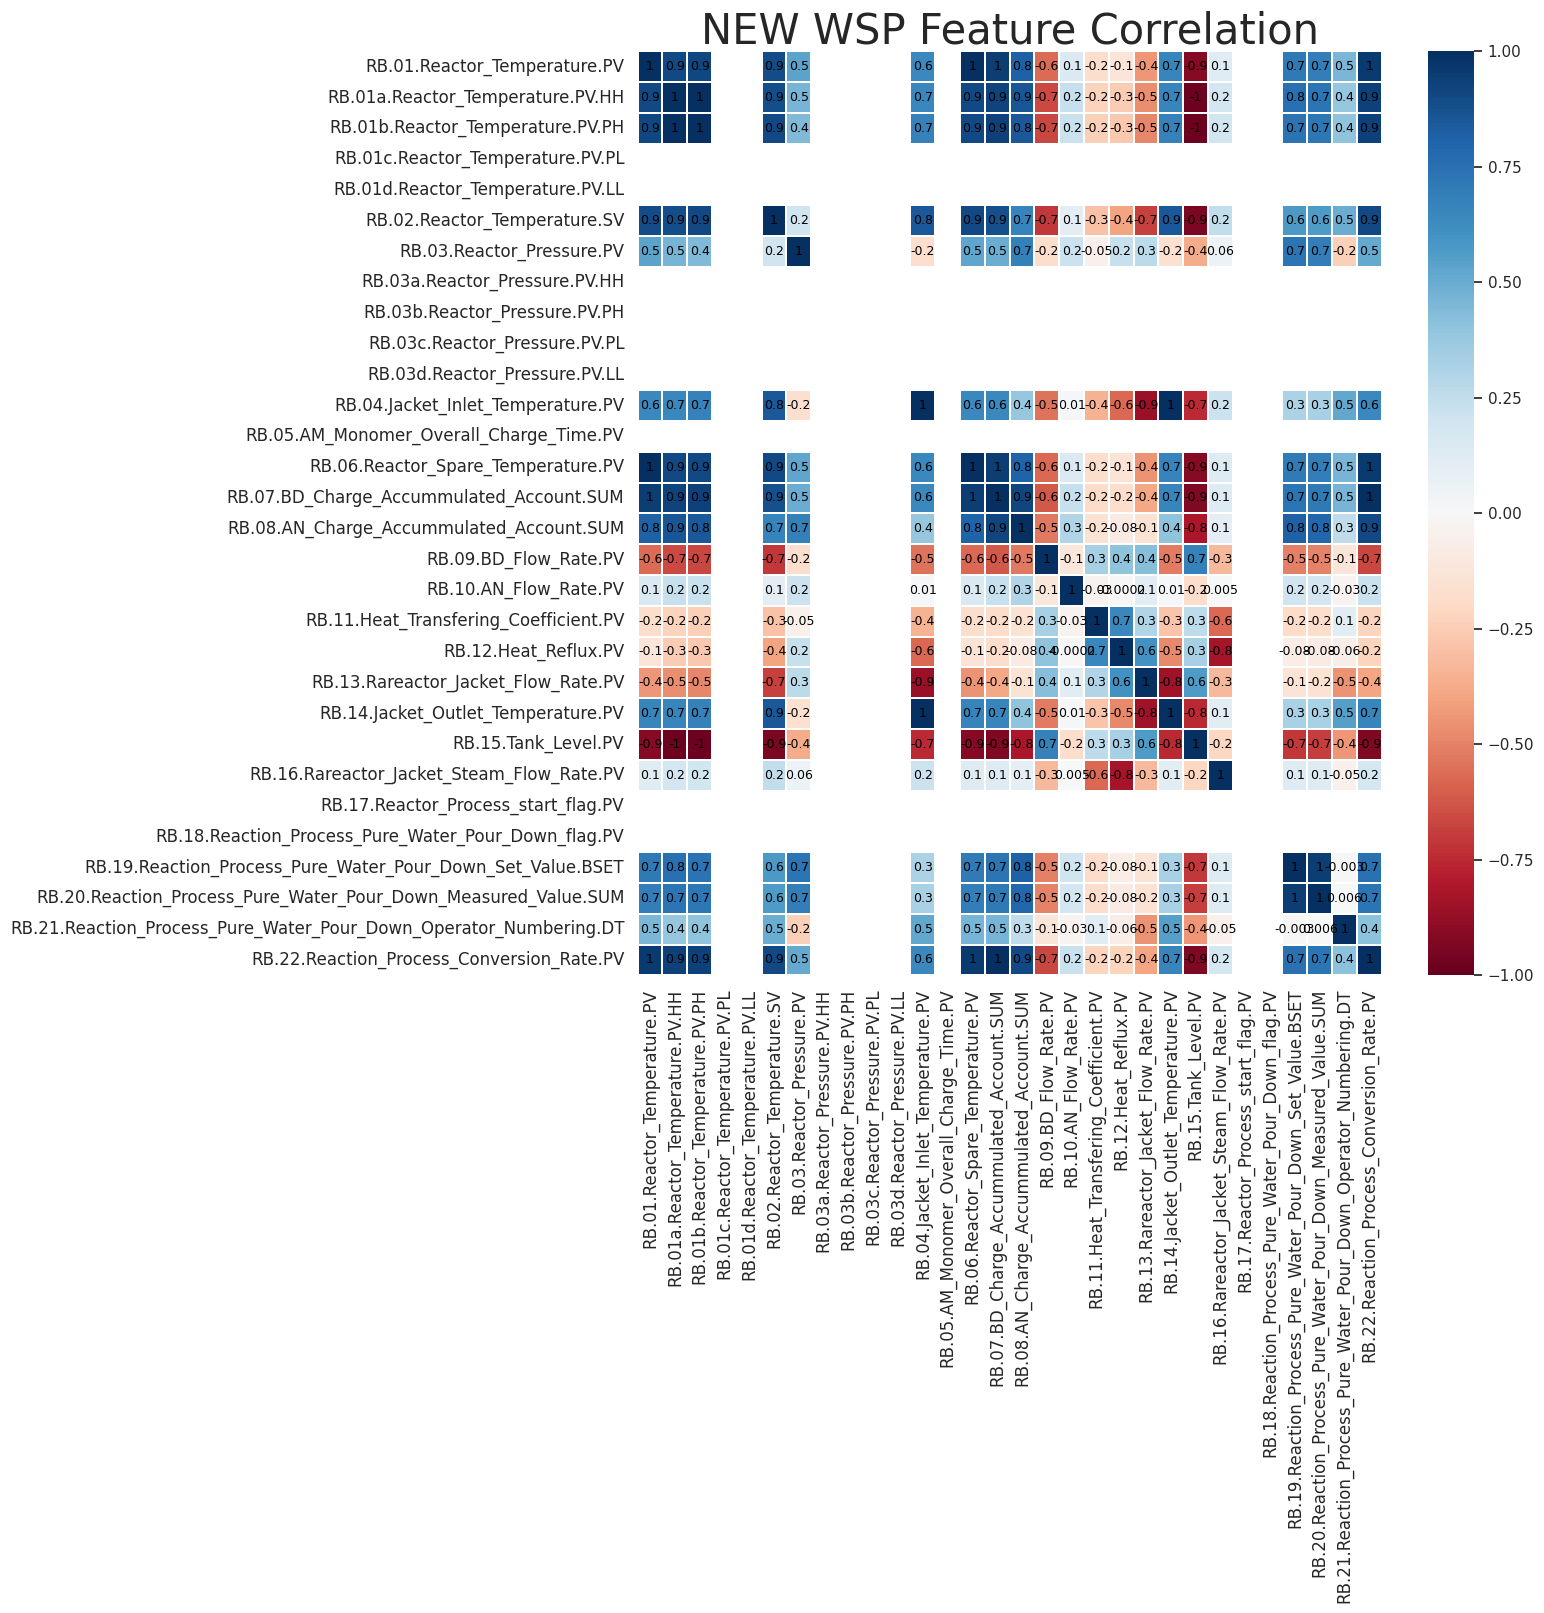

In [ ]:
#data = pd.read_csv('20211006.csv', sep=',', encoding='utf-8') #小測試

def FeatureCorreate(data,dropData):#顏色越深（黑），相關係數越小，顏色越淺（白），相關係數越大def FeatureCorreate(datasets,dropData):2020 10 22
    sns.set(context="paper", font="monospace")
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(12,12)) #10 10
    train_corr = data.drop(dropData,axis=1).corr() #datasets.drop(dropData,axis=1).corr()    20201022

    cmap = sns.cubehelix_palette(start = 1, rot = 100, gamma=0.4, as_cmap = True)
    #ax = sns.heatmap(train_corr,cmap = 'RdBu',ax=ax,vmin=-1, vmax=1,annot=True,fmt ='0.1g',linewidths=.1, linecolor= 'white', mask=(train_corr<0.2),annot_kws={'size':9,'weight':'normal', 'color':'black'}) #藍底示字
    ax = sns.heatmap(train_corr,cmap = 'RdBu',ax=ax,vmin=-1, vmax=1,annot=True,fmt ='0.1g',linewidths=.1, linecolor= 'white',annot_kws={'size':9,'weight':'normal', 'color':'black'}) #藍底示字
    ax.set_xticklabels(train_corr.index, size=12)
    ax.set_yticklabels(train_corr.index, size=12) #train_corr.columns[::-1], size=15  20201606就是字體大小啦

    ax.set_title('NEW WSP Feature Correlation', fontsize=30)#30

print("Train Features")
FeatureCorreate(df,'Time')

#FeatureCorreate(data,'Time')

## **#用其他模型挑出跟溫度有高度相關的關鍵因子**

In [ ]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [ ]:
df.isna().sum()

Time                                                                     0
RB.01.Reactor_Temperature.PV                                             0
RB.01a.Reactor_Temperature.PV.HH                                         0
RB.01b.Reactor_Temperature.PV.PH                                         0
RB.01c.Reactor_Temperature.PV.PL                                         0
RB.01d.Reactor_Temperature.PV.LL                                         0
RB.02.Reactor_Temperature.SV                                             0
RB.03.Reactor_Pressure.PV                                                0
RB.03a.Reactor_Pressure.PV.HH                                            0
RB.03b.Reactor_Pressure.PV.PH                                            0
RB.03c.Reactor_Pressure.PV.PL                                            0
RB.03d.Reactor_Pressure.PV.LL                                            0
RB.04.Jacket_Inlet_Temperature.PV                                        0
RB.05.AM_Monomer_Overall_

In [ ]:
df = df.fillna(0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
X = scaled_df.drop('RB.01.Reactor_Temperature.PV', axis=1)
y = scaled_df['RB.01.Reactor_Temperature.PV']
print(X.shape, y.shape)

(10596, 30) (10596,)


In [ ]:
from sklearn.model_selection import train_test_split
# define dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

def cross_val(model):


    pred = cross_val_score(model, X, y, cv=5,scoring='neg_mean_squared_error')
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

##1.線性回歸(Linear Regression)找出關鍵因子

In [ ]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

print('')
print('')
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])


Feature: 0, Score: -0.00000
Feature: 1, Score: 0.10188
Feature: 2, Score: -0.10174
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00042
Feature: 6, Score: 0.03057
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.66121
Feature: 12, Score: -0.00000
Feature: 13, Score: 0.99795
Feature: 14, Score: 0.15608
Feature: 15, Score: -0.01413
Feature: 16, Score: -0.00144
Feature: 17, Score: -0.00055
Feature: 18, Score: 0.00013
Feature: 19, Score: -0.08229
Feature: 20, Score: 0.01425
Feature: 21, Score: 0.64674
Feature: 22, Score: -0.02401
Feature: 23, Score: 0.00307
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00076
Feature: 26, Score: 0.00480
Feature: 27, Score: -0.00257
Feature: 28, Score: -0.00832
Feature: 29, Score: -0.18800


Test set evaluation:
_____________________________________
MAE: 0.005772510021867314
MSE: 5.826118849209425e-05
RMSE: 0.007632901708530921
R2 Square 0.999

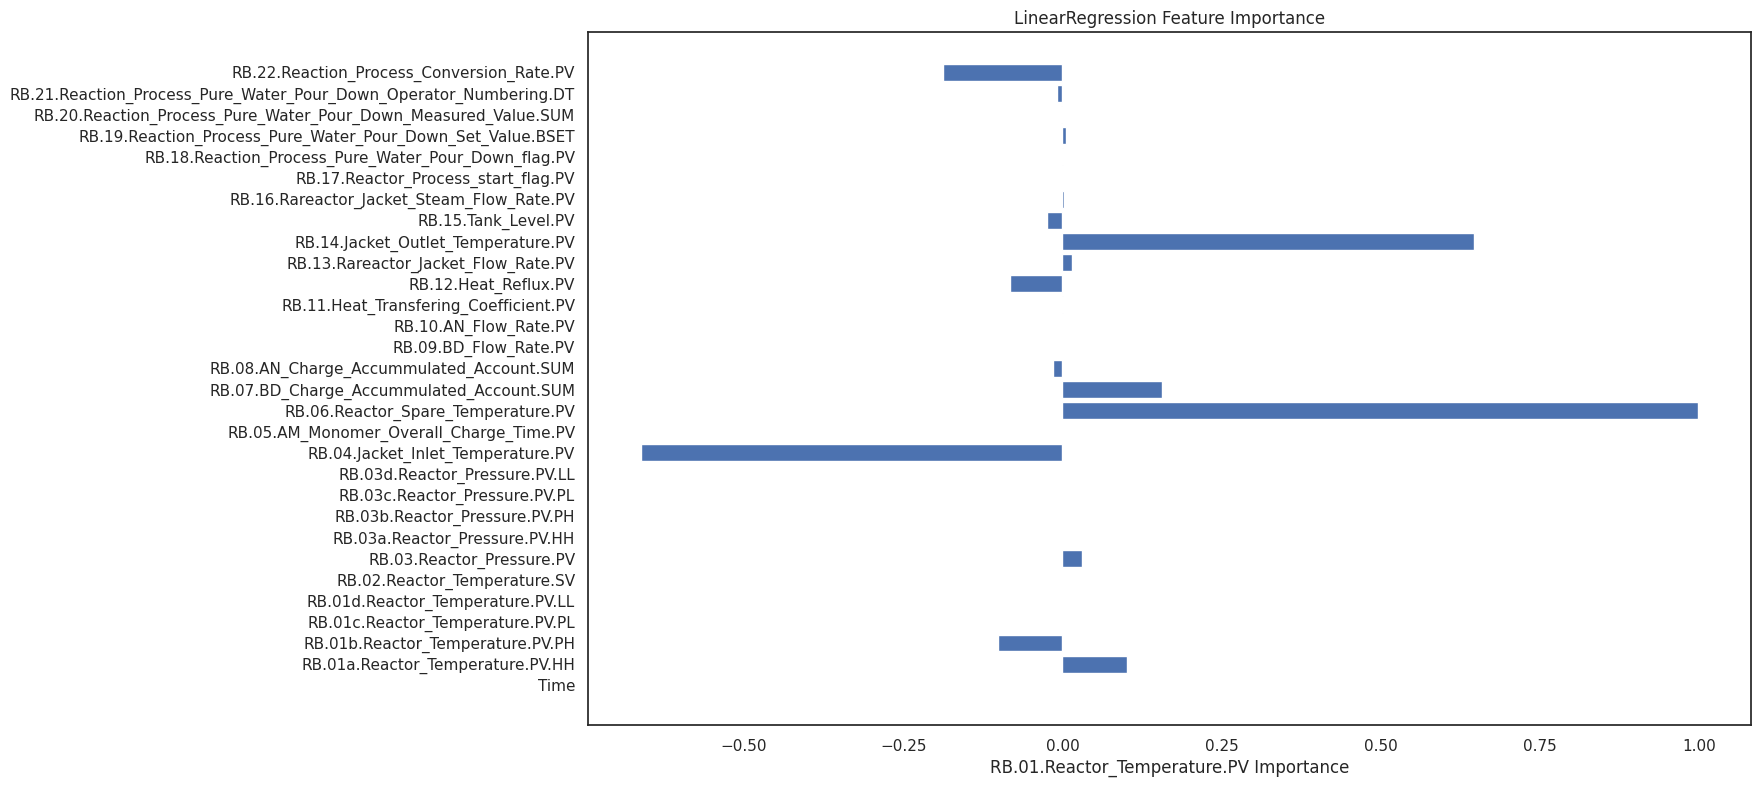

In [ ]:
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# 假設特徵名稱為 features，這是一個包含特徵名稱的列表
features = X.columns
plt.figure(figsize=(15, 9))
plt.barh(features, importance)  # 使用水平條形圖
plt.xlabel('RB.01.Reactor_Temperature.PV Importance')
plt.title('LinearRegression Feature Importance')

plt.show()

#2.Logistic Regression (連續性不能用)

In [ ]:
# from sklearn.linear_model import LogisticRegression

# # define the model
# model_2 = LogisticRegression()
# # fit the model
# model_2.fit(X_train, y_train)
# # get importance
# importance = model_2.coef_[0]
# # summarize feature importance
# for i,v in enumerate(importance):
#  print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

#3.CART Regression

In [ ]:

# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor

# define the model
model_3 = DecisionTreeRegressor()
# fit the model
model_3.fit(X_train, y_train)
# get importance
importance = model_3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

print('')
print('')

test_pred = model_3.predict(X_test)
train_pred = model_3.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression(remove outlier)", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00008
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.08102
Feature: 14, Score: 0.00036
Feature: 15, Score: 0.00176
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00009
Feature: 19, Score: 0.00005
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00007
Feature: 22, Score: 0.00024
Feature: 23, Score: 0.00007
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.91623


Test set evaluation:
_____________________________________
MAE: 0.0010639012612912925
MSE: 4.9635942207135575e-06
RMSE: 0.0022279125253729234
R2 Square 0.99999502517266

<ipython-input-62-dee2c2868bdd>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


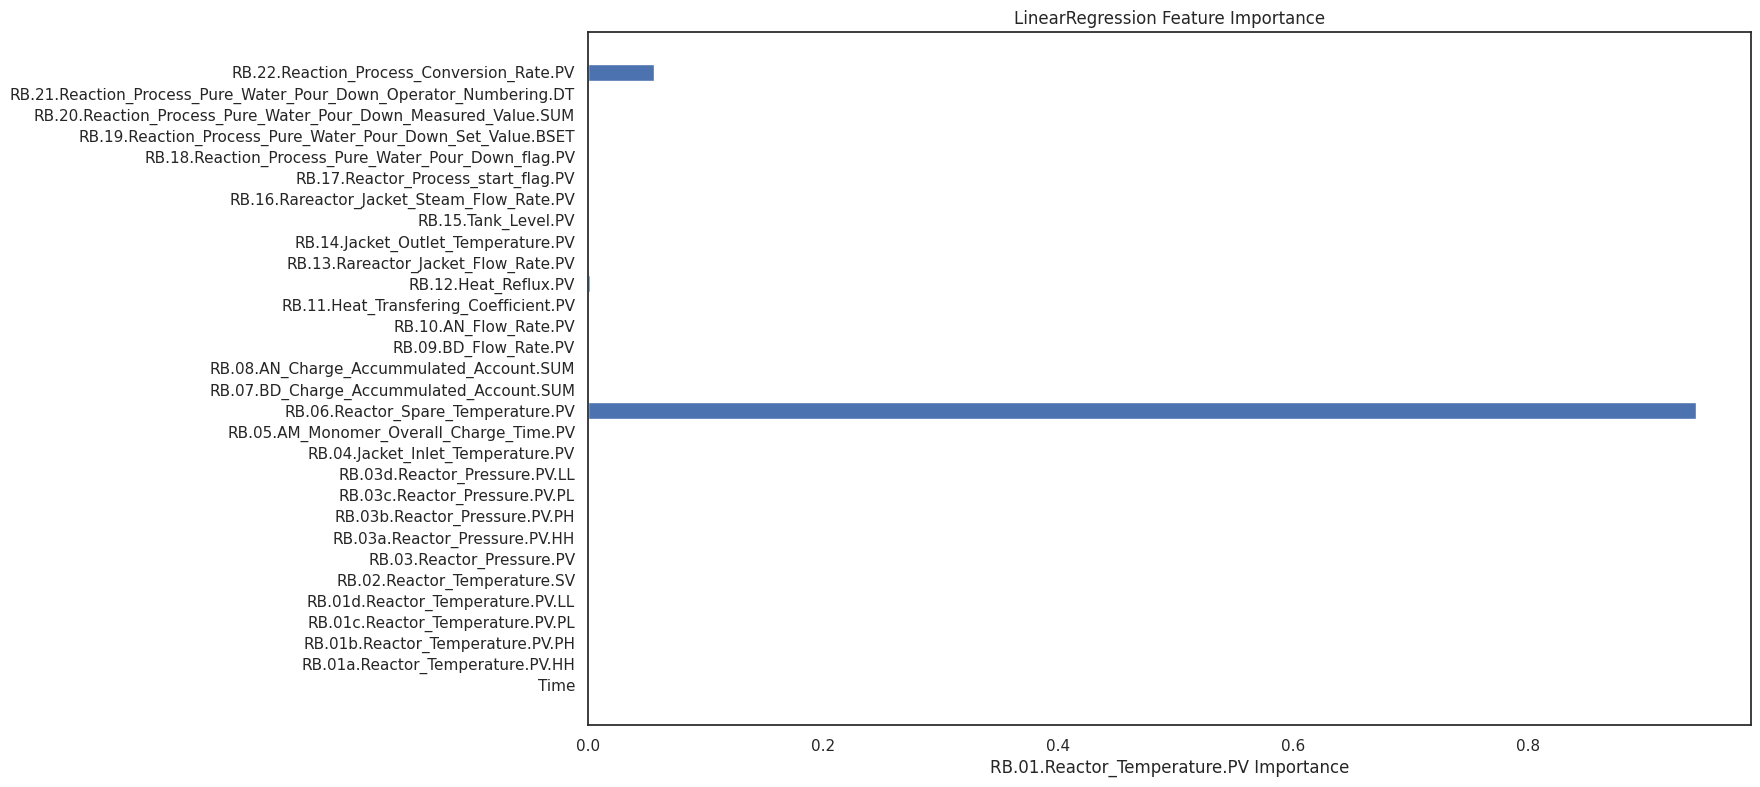

In [ ]:
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()
# 假設特徵名稱為 features，這是一個包含特徵名稱的列表
features = X.columns
plt.figure(figsize=(15, 9))
plt.barh(features, importance)  # 使用水平條形圖
plt.xlabel('RB.01.Reactor_Temperature.PV Importance')
plt.title('LinearRegression Feature Importance')

plt.show()

#4.CART Classification(連續性不能用)

In [ ]:
# # decision tree for feature importance on a classification problem
# from sklearn.tree import DecisionTreeClassifier
# # define the model
# model_4 = DecisionTreeClassifier()
# # fit the model
# model_4.fit(X, y)
# # get importance
# importance = model_4.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
#  print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

# 5.Robust Regression(remove outlier)
Random Sample Consensus - RANSAC

In [ ]:
from sklearn.linear_model import RANSACRegressor
model_5 = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model_5.fit(X_train, y_train)

importance = model_3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

print('')
print('')

test_pred = model_5.predict(X_test)
train_pred = model_5.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression(remove outlier)", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor(base_estimator=LinearRegression(), max_trials=100))]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00008
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.08102
Feature: 14, Score: 0.00036
Feature: 15, Score: 0.00176
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00009
Feature: 19, Score: 0.00005
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00007
Feature: 22, Score: 0.00024
Feature: 23, Score: 0.00007
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.91623


Test set evaluation:
_____________________________________
MAE: 0.00577251002186732
MSE: 5.82611884920945e-05
RMSE: 0.007632901708530937
R2 Square 0.9999416069605676
__

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
<ipython-input-63-de65249633b1>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


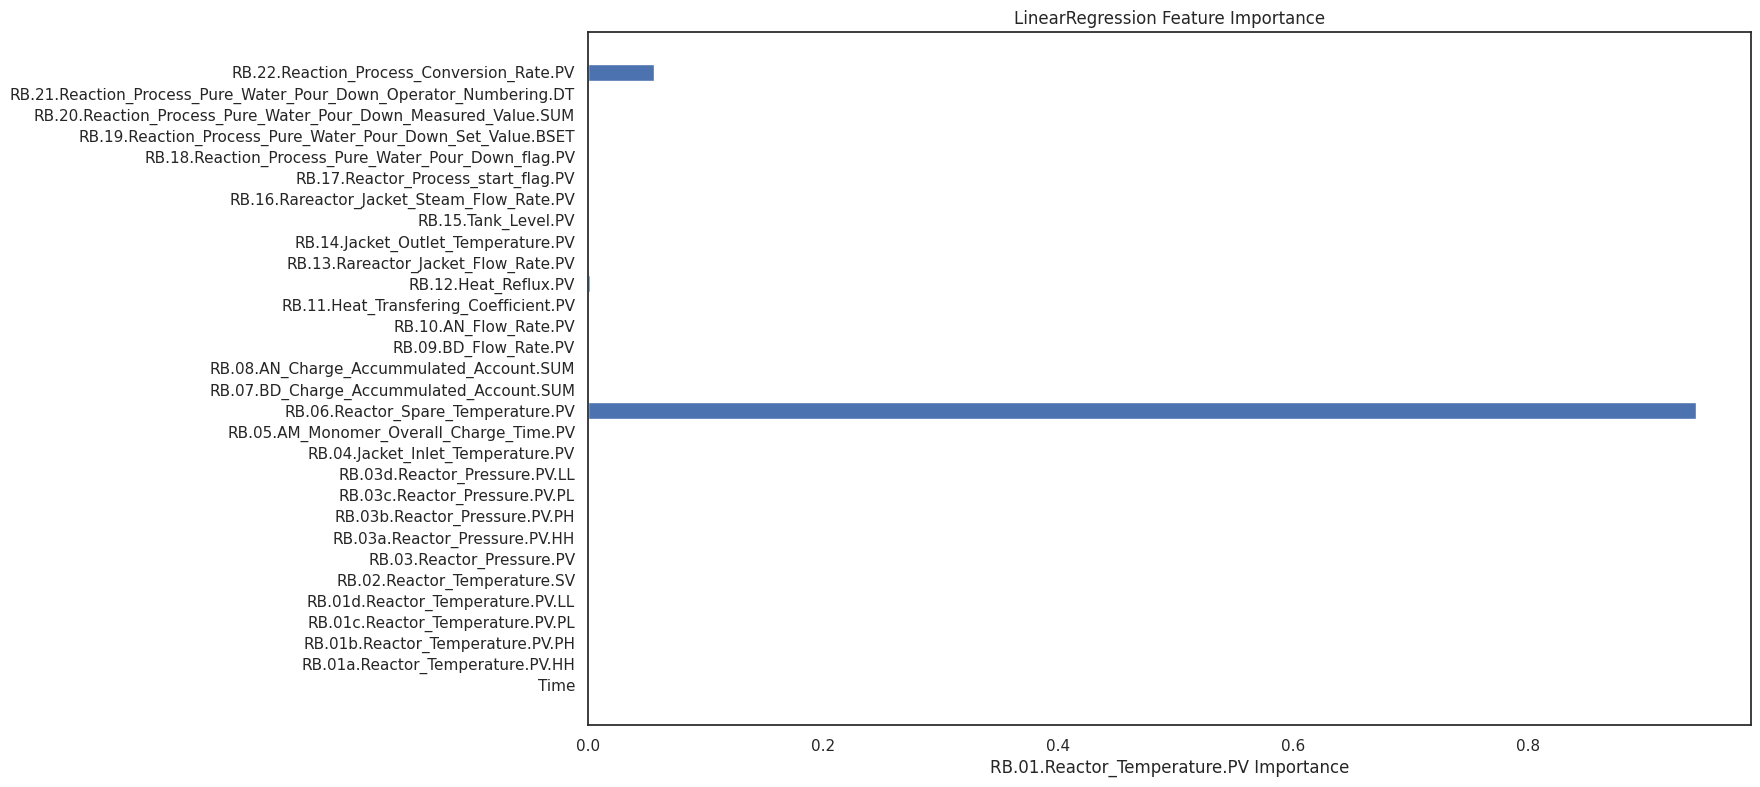

In [ ]:
# 假設特徵名稱為 features，這是一個包含特徵名稱的列表
features = X.columns
plt.figure(figsize=(15, 9))
plt.barh(features, importance)  # 使用水平條形圖
plt.xlabel('RB.01.Reactor_Temperature.PV Importance')
plt.title('LinearRegression Feature Importance')

plt.show()

# 6.Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

model_6 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
model_6.fit(X_train, y_train)
pred = model_6.predict(X_test)

print('')
print('')

test_pred = model_6.predict(X_test)
train_pred = model_6.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression(remove outlier)", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor(Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)))]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)